In [2]:
# The file that contains the normal DoH traffic data.
normal_doh_traffic_dataset = 'normal_doh_traffic_cloudflare_server.csv'

# The file that contains the malicious DoH traffic.
malicious_doh_traffic_dataset = 'dnscat2_data_4.csv'

# Import the pandas library
import pandas as pd

# Load the datasets into Pandas dataframes
normal_traffic_df    = pd.read_csv(normal_doh_traffic_dataset)
malicious_traffic_df = pd.read_csv(malicious_doh_traffic_dataset)

# Concatenate the normal testing data and the malicious data to
# create the evaluation data set
data_evaluation_df = pd.concat([normal_traffic_df, malicious_traffic_df])

# Shuffle the samples in the whole dataset.
data_evaluation_df = data_evaluation_df.sample(data_evaluation_df.shape[0], random_state=1)

# Save to CSV file
data_evaluation_df.to_csv('combined_doh_dataset.csv', index=False)


# Linear Regression

Coefficient: [1.00402209]
Intercept: 0.0016296025614322696
Mean Squared Error: 0.0010106458460839333


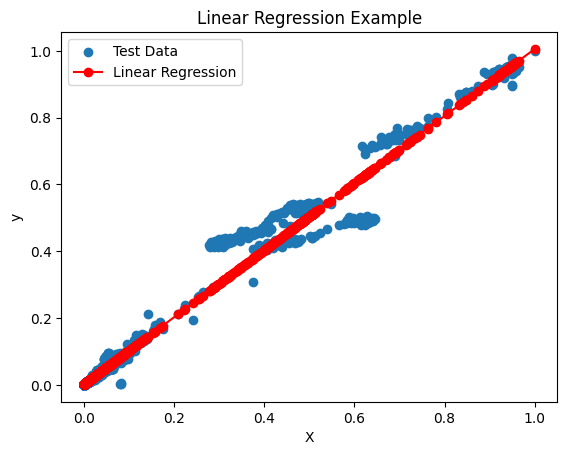

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


'''
Load the dataset. We use the Pandas library to read the comma separated value (CSV) file into a
dataframe.  A dataframe is the datastructure that Pandas uses to hold the data. You can roughly
think about it as a Excel sheet but for Python
'''
df = pd.read_csv('combined_doh_dataset.csv')

'''
In this script, we will use linear regression to predict the value of one feature based on only one other feature. That is, we will choose one column of the dataset and use the other column to predict it.
'''

'''
It is always a good idea to normalize the values in the dataset as they may be in very different ragnes. Dataset should already normalized.
'''
#df = (df - df.min()) / (df.max() - df.min()) # Experiment by commenting this line.

'''
Next, we choose the column that we want to predict. Based on your data exploration lab, choose two features that are highly correlated. Set one as the target and one as the training.
'''
target_column = 'bytes_out'
y = df[target_column]
y = y.to_numpy() # Turn the dataframe into numpy array. It is easier to use Scikit learn with Numpy arrays compared to dataframes.

'''
Our training dataset X is a column different from the target column.
'''
X = df['bytes_in'].to_numpy()
X = X[:, None] #to_numpy return an array of shape (n,). The None dimension turns it into (n,1)

'''
We are now ready to split the data into training and testing sets. Here, we use 20% of the data for
testing and set a seed for the pseudorandom number generator so that we always get the same training and
testing sets. THis makes debugging easier
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

'''
The next few steps are the routine steps that we follow to train a model and obtain the prediction
results.
'''
# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)


print("Coefficient:", model.coef_) #w's in the formulas
print("Intercept:", model.intercept_) #b in the formulas
print("Mean Squared Error:", mse)

'''
We now plot the test data and the predicted data.
'''
# Sort arrays for proper plotting
X_plot = X_test
sorted_indexes = np.argsort(X_plot[:,0])
sorted_X_test = X_plot[sorted_indexes]
sorted_y_pred = y_pred[sorted_indexes]
sorted_y_test = y_test[sorted_indexes]


# Plot the scatter plot of data points
plt.scatter(sorted_X_test, sorted_y_test, label='Test Data')
#plt.scatter(X_test[:,test_loc], y_test, label='Test Data')

# Plot the linear regression line
plt.plot(sorted_X_test.squeeze(), sorted_y_pred, color='red', label='Linear Regression', marker='o')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

# Linear Regression with target as 'num_pkts_out" & Input as "num_pkts_in"

Coefficient: [1.05649338]
Intercept: 0.010099074366441599
Mean Squared Error: 0.001980169266013307


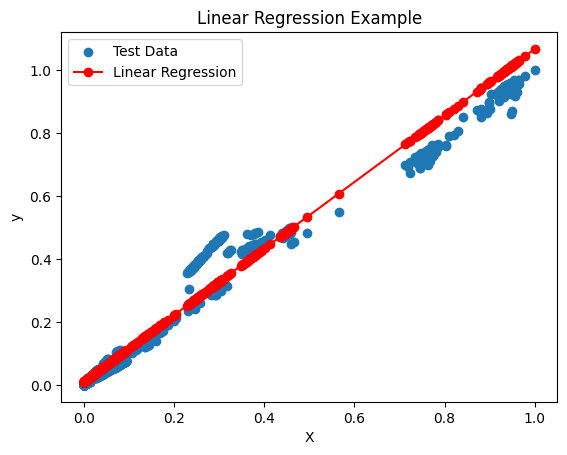

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


'''
Load the dataset. We use the Pandas library to read the comma separated value (CSV) file into a
dataframe.  A dataframe is the datastructure that Pandas uses to hold the data. You can roughly
think about it as a Excel sheet but for Python
'''
df = pd.read_csv('combined_doh_dataset.csv')

'''
In this script, we will use linear regression to predict the value of one feature based on only one other feature. That is, we will choose one column of the dataset and use the other column to predict it.
'''

'''
It is always a good idea to normalize the values in the dataset as they may be in very different ragnes. Dataset should already normalized.
'''
#df = (df - df.min()) / (df.max() - df.min()) # Experiment by commenting this line.

'''
Next, we choose the column that we want to predict. Based on your data exploration lab, choose two features that are highly correlated. Set one as the target and one as the training.
'''
target_column = 'num_pkts_out'
y = df[target_column].to_numpy()# Turn the dataframe into numpy array. It is easier to use Scikit learn with Numpy arrays compared to dataframes.

'''
Our training dataset X is a column different from the target column.
'''
X = df['num_pkts_in'].to_numpy()
X = X[:, None] #to_numpy return an array of shape (n,). The None dimension turns it into (n,1)

'''
We are now ready to split the data into training and testing sets. Here, we use 20% of the data for
testing and set a seed for the pseudorandom number generator so that we always get the same training and
testing sets. THis makes debugging easier
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

'''
The next few steps are the routine steps that we follow to train a model and obtain the prediction
results.
'''
# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)


print("Coefficient:", model.coef_) #w's in the formulas
print("Intercept:", model.intercept_) #b in the formulas
print("Mean Squared Error:", mse)

'''
We now plot the test data and the predicted data.
'''
# Sort arrays for proper plotting
X_plot = X_test
sorted_indexes = np.argsort(X_plot[:,0])
sorted_X_test = X_plot[sorted_indexes]
sorted_y_pred = y_pred[sorted_indexes]
sorted_y_test = y_test[sorted_indexes]


# Plot the scatter plot of data points
plt.scatter(sorted_X_test, sorted_y_test, label='Test Data')
#plt.scatter(X_test[:,test_loc], y_test, label='Test Data')

# Plot the linear regression line
plt.plot(sorted_X_test.squeeze(), sorted_y_pred, color='red', label='Linear Regression', marker='o')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

# Linear Regression with target as 'avg_pkt_size_in" & Input as "avg_pkt_size_out"

Coefficient: [0.29489989]
Intercept: 0.19382165976365268
Mean Squared Error: 0.002415870102750497


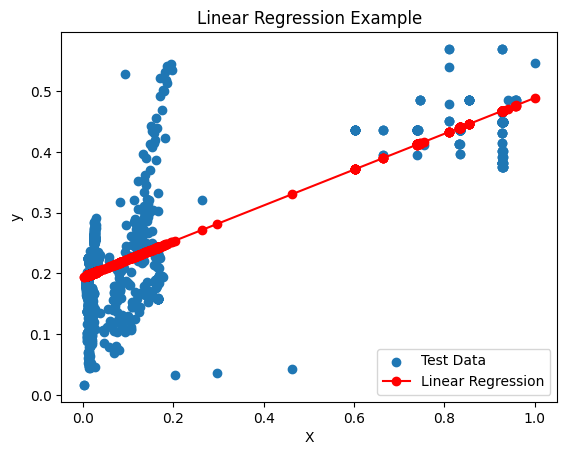

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


'''
Load the dataset. We use the Pandas library to read the comma separated value (CSV) file into a
dataframe.  A dataframe is the datastructure that Pandas uses to hold the data. You can roughly
think about it as a Excel sheet but for Python
'''
df = pd.read_csv('combined_doh_dataset.csv')

'''
In this script, we will use linear regression to predict the value of one feature based on only one other feature. That is, we will choose one column of the dataset and use the other column to predict it.
'''

'''
It is always a good idea to normalize the values in the dataset as they may be in very different ragnes. Dataset should already normalized.
'''
#df = (df - df.min()) / (df.max() - df.min()) # Experiment by commenting this line.

'''
Next, we choose the column that we want to predict. Based on your data exploration lab, choose two features that are highly correlated. Set one as the target and one as the training.
'''
target_column = 'av_pkt_size_out'
y = df[target_column].to_numpy()# Turn the dataframe into numpy array. It is easier to use Scikit learn with Numpy arrays compared to dataframes.

'''
Our training dataset X is a column different from the target column.
'''
X = df['av_pkt_size_in'].to_numpy()
X = X[:, None] #to_numpy return an array of shape (n,). The None dimension turns it into (n,1)

'''
We are now ready to split the data into training and testing sets. Here, we use 20% of the data for
testing and set a seed for the pseudorandom number generator so that we always get the same training and
testing sets. THis makes debugging easier
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

'''
The next few steps are the routine steps that we follow to train a model and obtain the prediction
results.
'''
# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)


print("Coefficient:", model.coef_) #w's in the formulas
print("Intercept:", model.intercept_) #b in the formulas
print("Mean Squared Error:", mse)

'''
We now plot the test data and the predicted data.
'''
# Sort arrays for proper plotting
X_plot = X_test
sorted_indexes = np.argsort(X_plot[:,0])
sorted_X_test = X_plot[sorted_indexes]
sorted_y_pred = y_pred[sorted_indexes]
sorted_y_test = y_test[sorted_indexes]


# Plot the scatter plot of data points
plt.scatter(sorted_X_test, sorted_y_test, label='Test Data')
#plt.scatter(X_test[:,test_loc], y_test, label='Test Data')

# Plot the linear regression line
plt.plot(sorted_X_test.squeeze(), sorted_y_pred, color='red', label='Linear Regression', marker='o')

plt.xlabel('X')
plt.ylabel('y')
plt.title('Linear Regression Example')
plt.legend()
plt.show()

# Multiple linear Regression

Coefficient: [-0.01506703 -0.3635905   1.38300187 -0.00396671]
Intercept: 0.0009072632315245133
Mean Squared Error: 7.00137054235303e-05


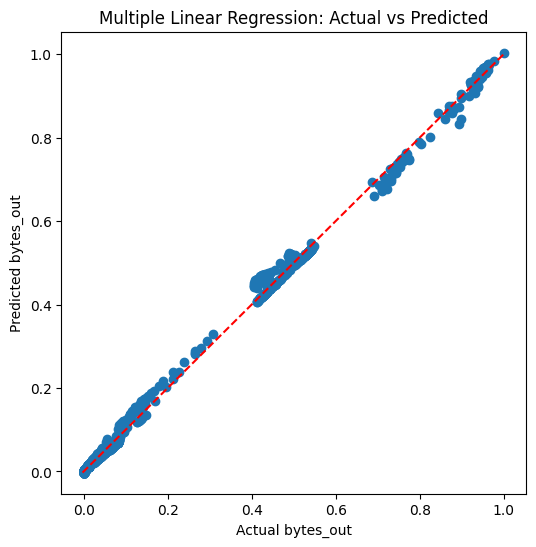

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


'''
Load the dataset. We use the Pandas library to read the comma separated value (CSV) file into a
dataframe.  A dataframe is the datastructure that Pandas uses to hold the data. You can roughly
think about it as a Excel sheet but for Python
'''
df = pd.read_csv('combined_doh_dataset.csv')

'''
In this script, we will use linear regression to predict the value of one feature based on only one other feature. That is, we will choose one column of the dataset and use the other column to predict it.
'''

'''
It is always a good idea to normalize the values in the dataset as they may be in very different ragnes. Dataset should already normalized.
'''
#df = (df - df.min()) / (df.max() - df.min()) # Experiment by commenting this line.

'''
Next, we choose the column that we want to predict. Based on your data exploration lab, choose two features that are highly correlated. Set one as the target and one as the training.
'''
target_column = 'bytes_out'
y = df[target_column].to_numpy()# Turn the dataframe into numpy array. It is easier to use Scikit learn with Numpy arrays compared to dataframes.

'''
Our training dataset X is a column different from the target column.
'''
X = df.loc[:, [
    'bytes_in',
    'num_pkts_in',
    'num_pkts_out',
    'bytes_ration'
]].to_numpy() #to_numpy return an array of shape (n,). The None dimension turns it into (n,1)

'''
We are now ready to split the data into training and testing sets. Here, we use 20% of the data for
testing and set a seed for the pseudorandom number generator so that we always get the same training and
testing sets. THis makes debugging easier
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

'''
The next few steps are the routine steps that we follow to train a model and obtain the prediction
results.
'''
# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)


print("Coefficient:", model.coef_) #w's in the formulas
print("Intercept:", model.intercept_) #b in the formulas
print("Mean Squared Error:", mse)

'''
We now plot Actual vs Predicted values.
This is the correct visualization for multiple linear regression.
'''

plt.figure(figsize=(6,6))

# Scatter plot of actual vs predicted
plt.scatter(y_test, y_pred)

# Draw ideal diagonal reference line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.xlabel('Actual bytes_out')
plt.ylabel('Predicted bytes_out')
plt.title('Multiple Linear Regression: Actual vs Predicted')
plt.show()




# Checking for Zero (or Near-Zero) Coefficients
# Using Multiple Training Features

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler


'''
Load the dataset. We use the Pandas library to read the comma separated value (CSV) file into a
dataframe.  A dataframe is the datastructure that Pandas uses to hold the data. You can roughly
think about it as a Excel sheet but for Python
'''
df = pd.read_csv('combined_doh_dataset.csv')

'''
In this script, we will use linear regression to predict the value of one feature based on only one other feature. That is, we will choose one column of the dataset and use the other column to predict it.
'''

'''
It is always a good idea to normalize the values in the dataset as they may be in very different ragnes. Dataset should already normalized.
'''
#df = (df - df.min()) / (df.max() - df.min()) # Experiment by commenting this line.

'''
Next, we choose the column that we want to predict. Based on your data exploration lab, choose two features that are highly correlated. Set one as the target and one as the training.
'''
target_column = 'bytes_out'
y = df[target_column].to_numpy()# Turn the dataframe into numpy array. It is easier to use Scikit learn with Numpy arrays compared to dataframes.

'''
Our training dataset X is a column different from the target column.
'''
X = df.loc[:, [
    'bytes_in',
    'num_pkts_in',
    'num_pkts_out',
    'bytes_ration',
    'mindelay',
    'avgdelay',
    'maxdelay',
    'median_in',
    'median_out'
]].to_numpy()
 #to_numpy return an array of shape (n,). The None dimension turns it into (n,1)

'''
We are now ready to split the data into training and testing sets. Here, we use 20% of the data for
testing and set a seed for the pseudorandom number generator so that we always get the same training and
testing sets. THis makes debugging easier
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

'''
The next few steps are the routine steps that we follow to train a model and obtain the prediction
results.
'''
# Initialize the LinearRegression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the mean squared error to evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)


print("Coefficient:", model.coef_) #w's in the formulas
print("Intercept:", model.intercept_) #b in the formulas
print("Mean Squared Error:", mse)



Coefficient: [-2.20978384e-02 -3.54158312e-01  1.37831964e+00 -1.84971939e-03
  7.77156117e-16 -1.43543506e-02 -1.06927545e-02 -3.21676284e-03
  1.17553634e-02]
Intercept: 0.0010143376942106097
Mean Squared Error: 6.647809466426049e-05


# Lasso Regresssion

Lasso Coefficients: [ 0.05673819  0.          0.95862681 -0.          0.         -0.
 -0.         -0.          0.        ]
Intercept: 0.004564702198769824
Mean Squared Error: 0.0003353154294155101
R^2 Score: 0.9940477471134553


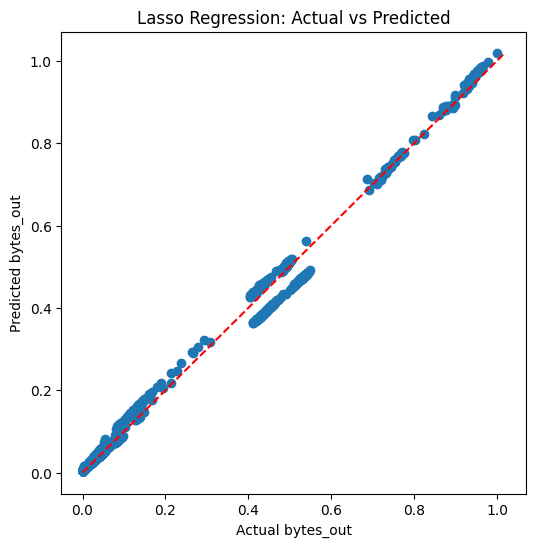

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error

'''
Load dataset
'''
df = pd.read_csv('combined_doh_dataset.csv')

'''
Target variable
'''
target_column = 'bytes_out'
y = df[target_column].to_numpy()

'''
Training features
'''
X = df.loc[:, [
    'bytes_in',
    'num_pkts_in',
    'num_pkts_out',
    'bytes_ration',
    'mindelay',
    'avgdelay',
    'maxdelay',
    'median_in',
    'median_out'
]].to_numpy()

'''
Split dataset into training and testing sets
'''
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

'''
Initialize and train Lasso model
alpha controls regularization strength
'''
model = Lasso(alpha=0.001, max_iter=10000)
model.fit(X_train, y_train)

'''
Make predictions
'''
y_pred = model.predict(X_test)

'''
Evaluate model
'''
mse = mean_squared_error(y_test, y_pred)

print("Lasso Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R^2 Score:", model.score(X_test, y_test))

'''
Plot Actual vs Predicted
'''
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)

# Ideal diagonal reference line
min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.xlabel("Actual bytes_out")
plt.ylabel("Predicted bytes_out")
plt.title("Lasso Regression: Actual vs Predicted")
plt.show()


# Non-Negative Least square Regression

Coefficients: [0.02819887 0.         1.00941566 0.         0.         0.
 0.         0.         0.01192223]
Intercept: -0.000667765615074617
Mean Squared Error: 0.00030810028387754073


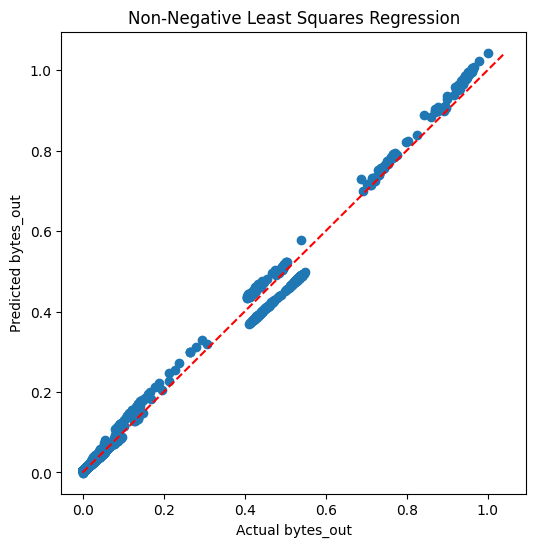

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load dataset
df = pd.read_csv('combined_doh_dataset.csv')

# Target variable
y = df['bytes_out'].to_numpy()

# Features
X = df.loc[:, [
    'bytes_in',
    'num_pkts_in',
    'num_pkts_out',
    'bytes_ration',
    'mindelay',
    'avgdelay',
    'maxdelay',
    'median_in',
    'median_out'
]].to_numpy()

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Non-Negative Least Squares
model = LinearRegression(positive=True)

model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)

# Plot
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred)

min_val = min(y_test.min(), y_pred.min())
max_val = max(y_test.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--')

plt.xlabel("Actual bytes_out")
plt.ylabel("Predicted bytes_out")
plt.title("Non-Negative Least Squares Regression")
plt.show()
